# Bit-Coin price data using Yahoo-Finance


In [1]:
import yfinance as yf
df = yf.download('BTC-USD');

[*********************100%%**********************]  1 of 1 completed


In [2]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-11-15,35548.113281,37964.894531,35383.781250,37880.582031,37880.582031,27365821679
2023-11-16,37879.980469,37934.625000,35545.472656,36154.769531,36154.769531,26007385366
2023-11-17,36164.824219,36704.484375,35901.234375,36596.683594,36596.683594,22445028430


# Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

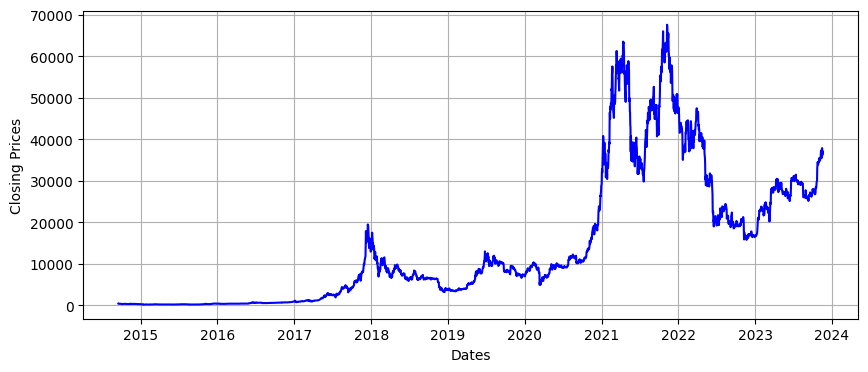

In [12]:
# x-axis: df.index--> the first colum is dates and should be treated as indices
# y-axis: df["Adj Close"]--> we are picking the column "Adj Close" only
plt.figure(figsize=(10,4));
plt.plot(df.index, df["Adj Close"], color='blue')
plt.xlabel("Dates");
plt.ylabel("Closing Prices");
plt.grid(True);
plt.show()

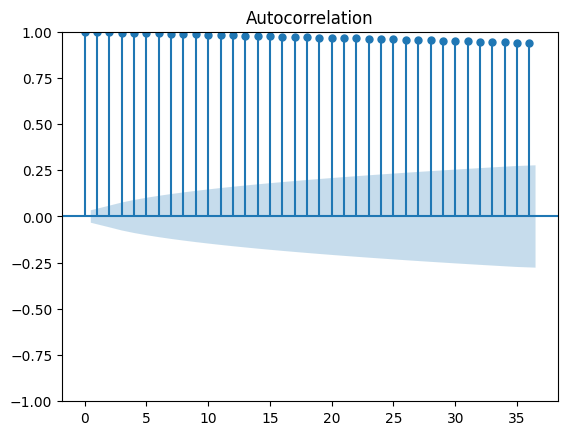

In [18]:
plot_acf(df["Adj Close"]);
plt.show();

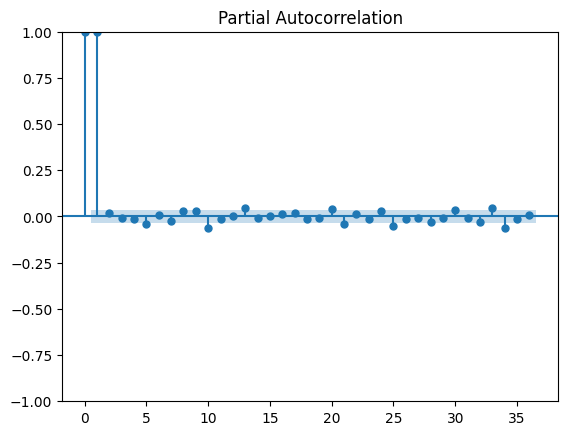

In [19]:
plot_pacf(df["Adj Close"]);
plt.show();

# Test-Train Splitting


In [28]:
# Train-Test split
# 90-10 split

print(f"Data:\t{df.shape}")
index1 = int(len(df)*0.9);

training_data = df[:index1]["Adj Close"];
testing_data  = df[index1:]["Adj Close"];
print(f"Train:\t{training_data.shape}","\n",
      f"Test:\t{testing_data.shape}","\n");

Data:	(3351, 6)
Train:	(3015,) 
 Test:	(336,) 



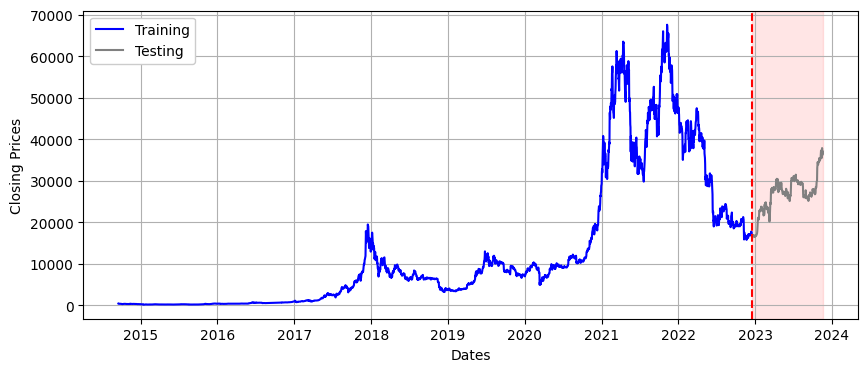

In [53]:
plt.figure(figsize=(10,4));
plt.plot(training_data.index, training_data[:index1],
         label= "Training",color="blue");
plt.plot(testing_data.index, testing_data[:index1],
         label= "Testing",color="grey");
plt.axvline(testing_data.index[0],
         color='r', linestyle="--");
plt.axvspan(testing_data.index[0], testing_data.index[-1],
            alpha=0.1, color='red');
plt.xlabel("Dates");
plt.ylabel("Closing Prices");
plt.grid(True);
plt.legend(framealpha=1);

# AutoRegressive Integrated Moving Average model run

In [7]:
testing_size        = testing_data.shape[0];
model_predictions   = np.zeros_like(testing_data);
training_data_copy  = np.copy(training_data);

In [8]:
for i in range(testing_size):
  model     = ARIMA(training_data_copy, order=(4,1,0));
  model_fit = model.fit();
  yhat      = model_fit.forecast();
  # Storing the prediction:
  model_predictions[i]  = yhat;
  # Updating the training_data with actual value for next prediction
  # To continue prediction based on previous ones update training_data_copy
  # with yhat, instead of actual_test_value
  actual_test_value     = np.array([testing_data[i]]);
  training_data_copy    = np.append(training_data_copy,actual_test_value,axis = 0);

print(model_fit.summary());

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3350
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -27047.382
Date:                Sun, 19 Nov 2023   AIC                          54104.763
Time:                        21:33:14   BIC                          54135.345
Sample:                             0   HQIC                         54115.702
                               - 3350                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0258      0.009     -2.868      0.004      -0.043      -0.008
ar.L2          0.0098      0.009      1.128      0.259      -0.007       0.027
ar.L3          0.0218      0.009      2.348      0.0

# Visualization

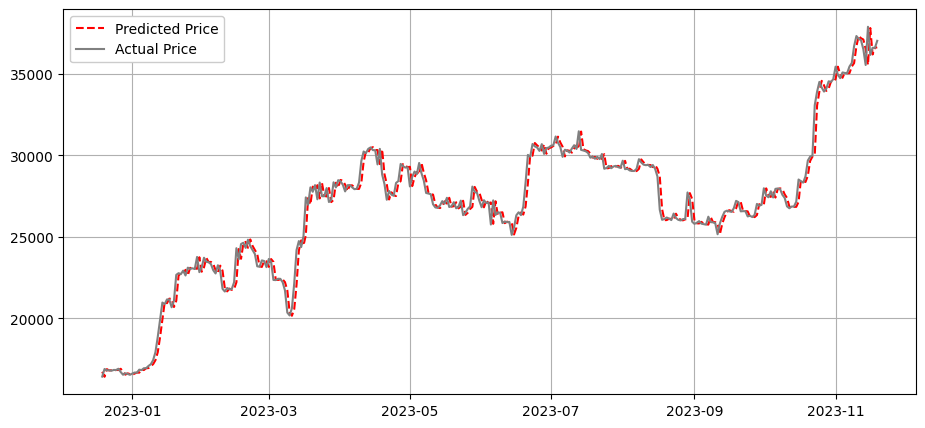

In [51]:
plt.figure(figsize=(11,5));
plt.plot(testing_data.index,model_predictions,"--",
         color="red", label="Predicted Price");
plt.plot(testing_data.index,testing_data,
         color="grey", label="Actual Price");
plt.legend(framealpha=1);
plt.grid();

# Conclusion

In [10]:
# Mean-Absolute-Percentage-Error (MAPE):
MAPE = np.mean( np.abs(model_predictions - testing_data ) / np.abs( testing_data) );
print(f"Mean-Absolute-Percentage-Error:\t{MAPE*100:.2f}%");
print(f"Model-Accuracy:\t{(1-MAPE)*100:.2f}%");

Mean-Absolute-Percentage-Error:	1.47%
Model-Accuracy:	98.53%
